Problem statement: To build a CNN based model which can accurately detect melanoma. Melanoma is a type of cancer that can be deadly if not detected early. It accounts for 75% of skin cancer deaths. A solution which can evaluate images and alert the dermatologists about the presence of melanoma has the potential to reduce a lot of manual effort needed in diagnosis.

### Importing Skin Cancer Data
#### To do: Take necessary actions to read the data

### Importing all the important libraries

In [ ]:
import pathlib
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import PIL
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [ ]:
## If you are using the data by mounting the google drive, use the following :
from google.colab import drive
drive.mount('/content/gdrive')

##Ref:https://towardsdatascience.com/downloading-datasets-into-google-drive-via-google-colab-bcb1b30b0166

Mounted at /content/gdrive


This assignment uses a dataset of about 2357 images of skin cancer types. The dataset contains 9 sub-directories in each train and test subdirectories. The 9 sub-directories contains the images of 9 skin cancer types respectively.

In [ ]:
# Defining the path for train and test images
## Todo: Update the paths of the train and test dataset
data_dir_train = pathlib.Path("/content/gdrive/MyDrive/Colab Notebooks/Train")
data_dir_test = pathlib.Path('/content/gdrive/MyDrive/Colab Notebooks/Test')

In [ ]:
image_count_train = len(list(data_dir_train.glob('*/*.jpg')))
print(image_count_train)
image_count_test = len(list(data_dir_test.glob('*/*.jpg')))
print(image_count_test)

2275
118


### Load using keras.preprocessing

Let's load these images off disk using the helpful image_dataset_from_directory utility.

### Create a dataset

Define some parameters for the loader:

In [ ]:
batch_size = 32
img_height = 180
img_width = 180

Use 80% of the images for training, and 20% for validation.

In [ ]:
## Write your train dataset here
## Note use seed=123 while creating your dataset using tf.keras.preprocessing.image_dataset_from_directory
## Note, make sure your resize your images to the size img_height*img_width, while writting the dataset
train_ds = tf.keras.preprocessing.image_dataset_from_directory(data_dir_train,seed=123,validation_split= 0.2,
                                                              subset= 'training',image_size=(img_height,img_width),batch_size = batch_size)

Found 2275 files belonging to 9 classes.
Using 1820 files for training.


In [ ]:
## Write your validation dataset here
## Note use seed=123 while creating your dataset using tf.keras.preprocessing.image_dataset_from_directory
## Note, make sure your resize your images to the size img_height*img_width, while writting the dataset
val_ds = tf.keras.preprocessing.image_dataset_from_directory(data_dir_train,seed=123,validation_split= 0.2,
                                                             subset= 'validation',image_size=(img_height,img_width),batch_size = batch_size)

Found 2275 files belonging to 9 classes.
Using 455 files for validation.


In [ ]:
# List out all the classes of skin cancer and store them in a list. 
# You can find the class names in the class_names attribute on these datasets. 
# These correspond to the directory names in alphabetical order.
class_names = train_ds.class_names
print(class_names)

['actinic keratosis', 'basal cell carcinoma', 'dermatofibroma', 'melanoma', 'nevus', 'pigmented benign keratosis', 'seborrheic keratosis', 'squamous cell carcinoma', 'vascular lesion']


### Visualize the data
#### Todo, create a code to visualize one instance of all the nine classes present in the dataset

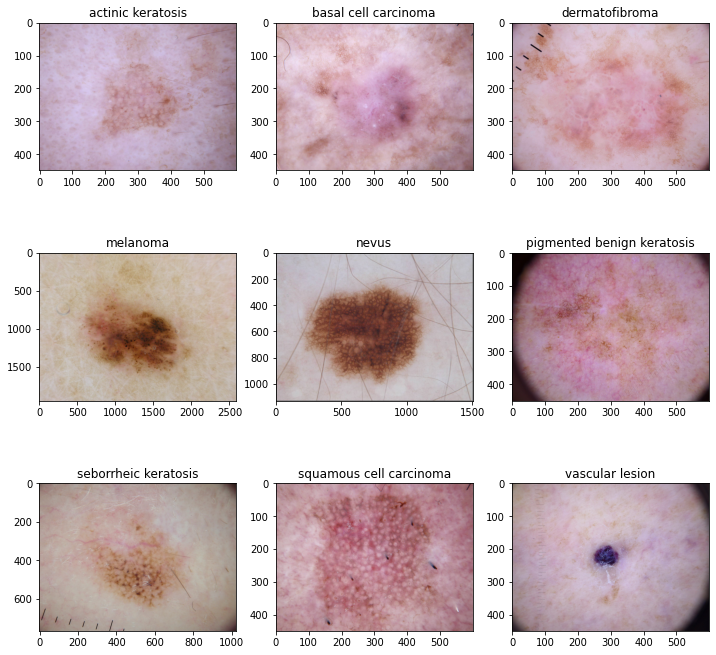

In [ ]:
import matplotlib.pyplot as plt

### your code goes here, you can use training or validation data to visualize
plt.figure(figsize=(12,12))
for img in range(0,9): 
  plt.subplot(3, 3, img + 1)
  visualize_image = plt.imread(str(list(data_dir_train.glob(class_names[img]+'/*.jpg'))[1]))
  plt.title(class_names[img])
  plt.imshow(visualize_image)

The `image_batch` is a tensor of the shape `(32, 180, 180, 3)`. This is a batch of 32 images of shape `180x180x3` (the last dimension refers to color channels RGB). The `label_batch` is a tensor of the shape `(32,)`, these are corresponding labels to the 32 images.

`Dataset.cache()` keeps the images in memory after they're loaded off disk during the first epoch.

`Dataset.prefetch()` overlaps data preprocessing and model execution while training.

In [ ]:
AUTOTUNE = tf.data.experimental.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

### Create the model
#### Todo: Create a CNN model, which can accurately detect 9 classes present in the dataset. Use ```layers.experimental.preprocessing.Rescaling``` to normalize pixel values between (0,1). The RGB channel values are in the `[0, 255]` range. This is not ideal for a neural network. Here, it is good to standardize values to be in the `[0, 1]`

In [ ]:
### Your code goes here
from keras.layers import Dense,Conv2D,Dropout,MaxPool2D,Flatten
num_of_classes = 9
model = Sequential([
                    layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width,3))
])
model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu', input_shape = (180, 180, 32)))
model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Conv2D(filters = 64, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Conv2D(filters = 64, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.20))

model.add(Flatten())
model.add(Dense(num_of_classes, activation = "softmax"))

### Compile the model
Choose an appropirate optimiser and loss function for model training 

In [ ]:
### Todo, choose an appropirate optimiser and loss function
from keras.losses import SparseCategoricalCrossentropy
model.compile(optimizer='adam',
              loss=SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [ ]:
# View the summary of all layers
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_1 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 conv2d_5 (Conv2D)           (None, 180, 180, 32)      2432      
                                                                 
 conv2d_6 (Conv2D)           (None, 180, 180, 32)      25632     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 90, 90, 32)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 90, 90, 64)        51264     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 45, 45, 64)       0         
 2D)                                                  

### Train the model

In [ ]:
epochs = 20
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/20


/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


57/57 [==============================] - 12s 193ms/step - loss: 2.0666 - accuracy: 0.2011 - val_loss: 2.0461 - val_accuracy: 0.1934
Epoch 2/20
57/57 [==============================] - 10s 174ms/step - loss: 1.9344 - accuracy: 0.2736 - val_loss: 1.7833 - val_accuracy: 0.3099
Epoch 3/20
57/57 [==============================] - 10s 173ms/step - loss: 1.6619 - accuracy: 0.3841 - val_loss: 1.6261 - val_accuracy: 0.3648
Epoch 4/20
57/57 [==============================] - 10s 172ms/step - loss: 1.6393 - accuracy: 0.3995 - val_loss: 1.6109 - val_accuracy: 0.4132
Epoch 5/20
57/57 [==============================] - 10s 171ms/step - loss: 1.5935 - accuracy: 0.4220 - val_loss: 1.5895 - val_accuracy: 0.3824
Epoch 6/20
57/57 [==============================] - 10s 172ms/step - loss: 1.5750 - accuracy: 0.4390 - val_loss: 1.5815 - val_accuracy: 0.4286
Epoch 7/20
57/57 [==============================] - 10s 171ms/step - loss: 1.5631 - accuracy: 0.4269 - val_loss: 1.5846 - val_accuracy: 0.4000
Epoch 8/20

### Visualizing training results

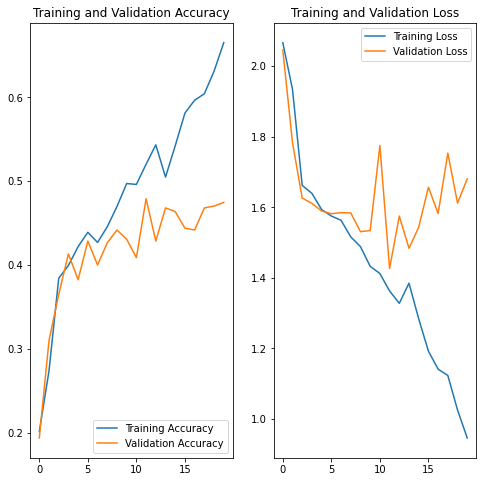

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#####The Training Accuracy has gone close upto 70% but the test accuracy is down at 50% showing and also we can see the training loss and testing loss deviate from epoch 8 which is also a clear sign of overfitting

### Write your findings here

In [ ]:
# Todo, after you have analysed the model fit history for presence of underfit or overfit, choose an appropriate data augumentation strategy. 
data_augument = keras.Sequential([
                             layers.experimental.preprocessing.RandomFlip(mode="horizontal_and_vertical",input_shape=(img_height,img_width,3)),
                             layers.experimental.preprocessing.RandomRotation(0.2, fill_mode='reflect'),
                             layers.experimental.preprocessing.RandomZoom(height_factor=(0.2, 0.3), width_factor=(0.2, 0.3), fill_mode='reflect')
])

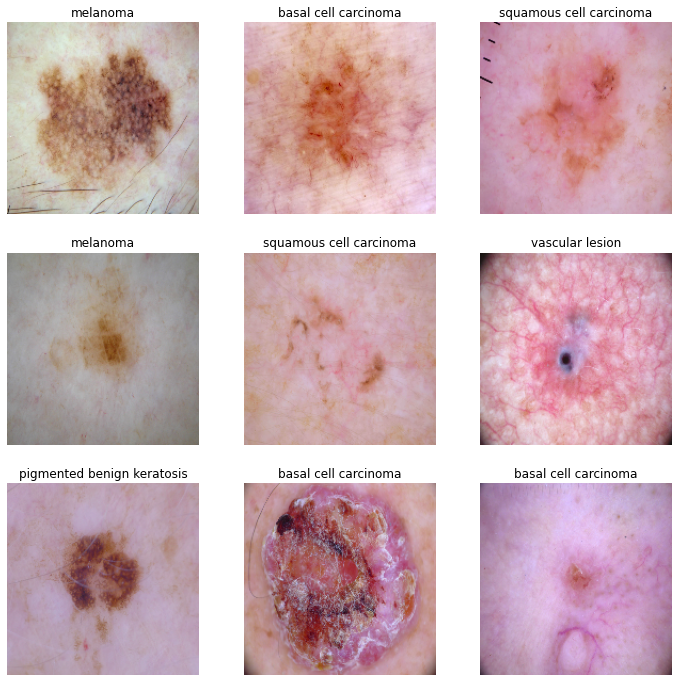

In [ ]:
# Todo, visualize how your augmentation strategy works for one instance of training image.
plt.figure(figsize=(12, 12))
for visualize_images, visualize_labels in train_ds.take(1):
    for img in range(9):
        axis = plt.subplot(3, 3, img + 1)
        plt.imshow(data_augument(visualize_images)[img].numpy().astype("uint8"))
        plt.title(class_names[visualize_labels[img]])
        plt.axis("off")

### Todo:
### Create the model, compile and train the model


In [ ]:
## You can use Dropout layer if there is an evidence of overfitting in your findings


from keras.layers import Dense,Conv2D,Dropout,MaxPool2D,Flatten
num_of_classes = 9
model = Sequential([data_augument,
                    layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width,3))
])
model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu', input_shape = (180, 180, 32)))
model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Conv2D(filters = 64, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Conv2D(filters = 64, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(num_of_classes, activation = "softmax"))

### Compiling the model

In [ ]:
## Your code goes here
from keras.losses import SparseCategoricalCrossentropy
model.compile(optimizer='adam',
              loss=SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

### Training the model

In [ ]:
## Your code goes here, note: train your model for 20 epochs
epochs = 20
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/20


/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


57/57 [==============================] - 12s 185ms/step - loss: 2.0610 - accuracy: 0.1978 - val_loss: 2.0272 - val_accuracy: 0.3187
Epoch 2/20
57/57 [==============================] - 10s 181ms/step - loss: 1.8861 - accuracy: 0.3192 - val_loss: 1.7420 - val_accuracy: 0.3890
Epoch 3/20
57/57 [==============================] - 10s 181ms/step - loss: 1.6914 - accuracy: 0.3852 - val_loss: 1.7031 - val_accuracy: 0.3824
Epoch 4/20
57/57 [==============================] - 10s 180ms/step - loss: 1.6365 - accuracy: 0.4137 - val_loss: 1.5961 - val_accuracy: 0.3978
Epoch 5/20
57/57 [==============================] - 10s 180ms/step - loss: 1.6552 - accuracy: 0.4016 - val_loss: 1.7157 - val_accuracy: 0.3824
Epoch 6/20
57/57 [==============================] - 10s 179ms/step - loss: 1.6349 - accuracy: 0.4033 - val_loss: 1.6909 - val_accuracy: 0.3692
Epoch 7/20
57/57 [==============================] - 10s 178ms/step - loss: 1.6077 - accuracy: 0.4231 - val_loss: 1.6963 - val_accuracy: 0.3670
Epoch 8/20

### Visualizing the results

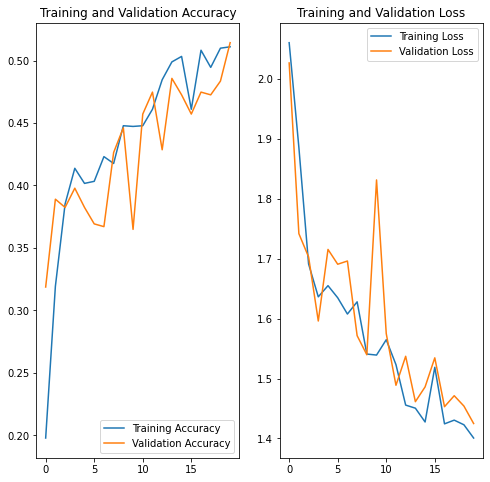

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### The model is now refined. Accuracy has come down a bit to 55% and thats not a major problem as it can be treated with increase of epochs. But the refinement is in terms of overfitting and it has improved a lot compared to the previous model

#### **Todo:** Find the distribution of classes in the training dataset.
#### **Context:** Many times real life datasets can have class imbalance, one class can have proportionately higher number of samples compared to the others. Class imbalance can have a detrimental effect on the final model quality. Hence as a sanity check it becomes important to check what is the distribution of classes in the data.

In [ ]:
image_path_list=[]
label_list=[]
for x in class_names:
      
    for y in data_dir_train.glob(x+'/*.jpg'):
        image_path_list.append(str(y))
        label_list.append(x)
dataframe_dict_original = dict(zip(image_path_list, label_list))
data_df = pd.DataFrame(list(dataframe_dict_original.items()),columns = ['Path','Label'])
data_df

,Path,Label
0,/content/gdrive/MyDrive/Colab Notebooks/Train/...,actinic keratosis
1,/content/gdrive/MyDrive/Colab Notebooks/Train/...,actinic keratosis
2,/content/gdrive/MyDrive/Colab Notebooks/Train/...,actinic keratosis
3,/content/gdrive/MyDrive/Colab Notebooks/Train/...,actinic keratosis
4,/content/gdrive/MyDrive/Colab Notebooks/Train/...,actinic keratosis
...,...,...
2270,/content/gdrive/MyDrive/Colab Notebooks/Train/...,vascular lesion
2271,/content/gdrive/MyDrive/Colab Notebooks/Train/...,vascular lesion
2272,/content/gdrive/MyDrive/Colab Notebooks/Train/...,vascular lesion
2273,/content/gdrive/MyDrive/Colab Notebooks/Train/...,vascular lesion


<BarContainer object of 9 artists>

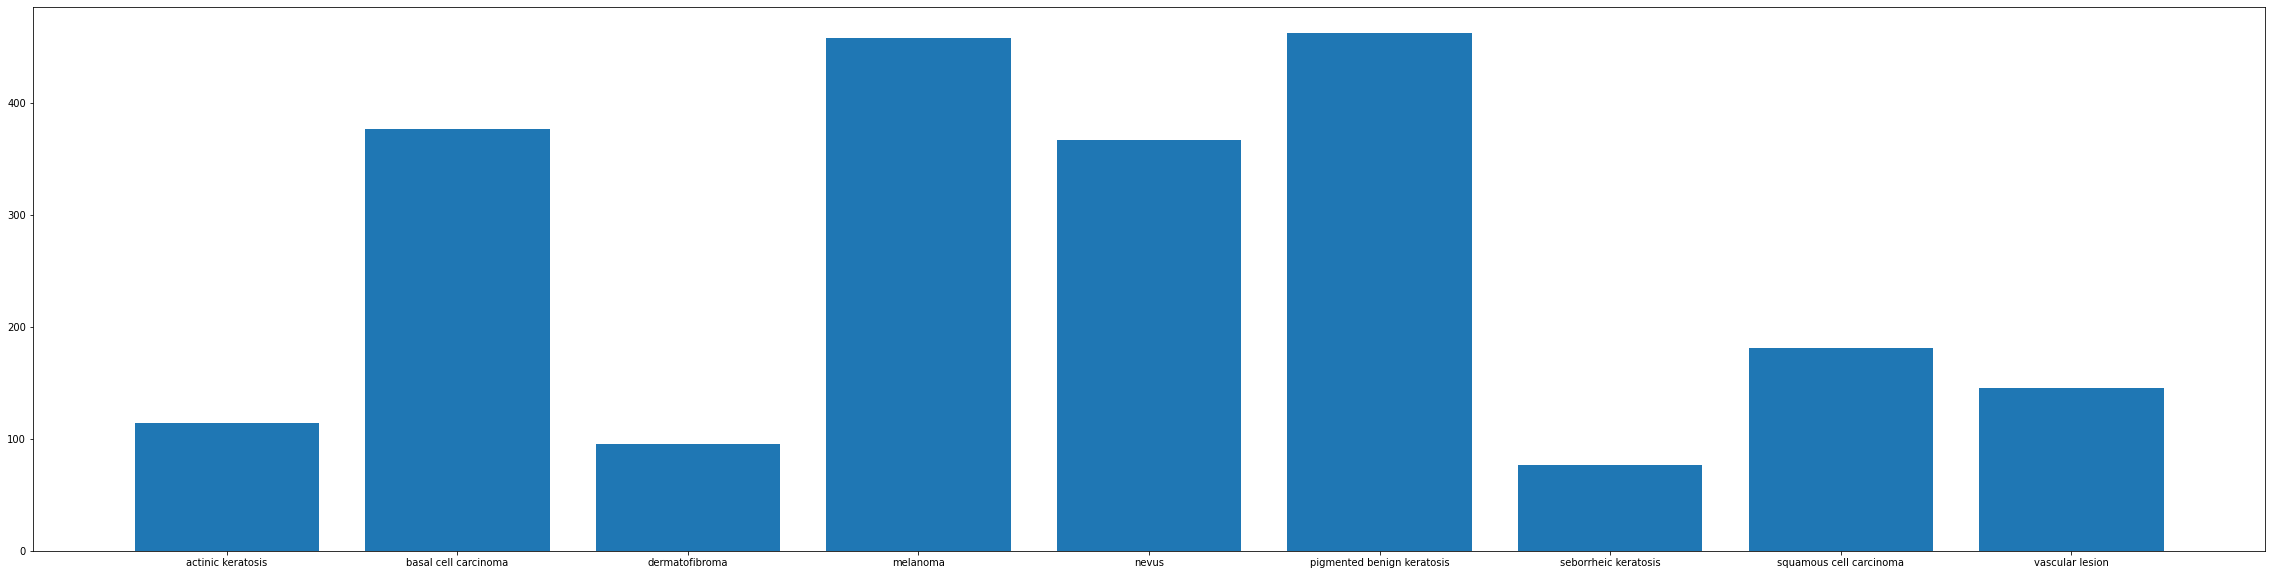

In [ ]:
label_count=[]
for x in class_names:
    label_count.append(len(list(data_dir_train.glob(x+'/*.jpg'))))
plt.figure(figsize=(40,10))
plt.bar(class_names,label_count)

#### seborrheic keratosis has the least samples
#### Melanoma and pigmented benign keratosis are almost equally highly proportional interms of samples and also actinic keratosis and dermatofibroma are also equally proportionate


#### **Todo:** Rectify the class imbalance
#### **Context:** You can use a python package known as `Augmentor` (https://augmentor.readthedocs.io/en/master/) to add more samples across all classes so that none of the classes have very few samples.

In [ ]:
!pip install Augmentor

To use `Augmentor`, the following general procedure is followed:

1. Instantiate a `Pipeline` object pointing to a directory containing your initial image data set.<br>
2. Define a number of operations to perform on this data set using your `Pipeline` object.<br>
3. Execute these operations by calling the `Pipeline’s` `sample()` method.


In [ ]:
path_to_training_dataset="/content/gdrive/MyDrive/Colab Notebooks/Train/"
import Augmentor
for i in class_names:
    p = Augmentor.Pipeline(path_to_training_dataset + i)
    p.rotate(probability=0.7, max_left_rotation=10, max_right_rotation=10)
    p.sample(500) ## We are adding 500 samples per class to make sure that none of the classes are sparse.

Initialised with 114 image(s) found.
Output directory set to /content/gdrive/MyDrive/Colab Notebooks/Train/actinic keratosis/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x7F96C6B03D10>: 100%|██████████| 500/500 [00:22<00:00, 22.23 Samples/s]


Initialised with 376 image(s) found.
Output directory set to /content/gdrive/MyDrive/Colab Notebooks/Train/basal cell carcinoma/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F96C6F79E90>: 100%|██████████| 500/500 [00:22<00:00, 22.66 Samples/s]


Initialised with 95 image(s) found.
Output directory set to /content/gdrive/MyDrive/Colab Notebooks/Train/dermatofibroma/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x7F96C68D7490>: 100%|██████████| 500/500 [00:22<00:00, 22.02 Samples/s]


Initialised with 458 image(s) found.
Output directory set to /content/gdrive/MyDrive/Colab Notebooks/Train/melanoma/output.

Processing <PIL.Image.Image image mode=RGB size=1024x768 at 0x7F96C6B16710>: 100%|██████████| 500/500 [01:39<00:00,  5.01 Samples/s]


Initialised with 367 image(s) found.
Output directory set to /content/gdrive/MyDrive/Colab Notebooks/Train/nevus/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=919x802 at 0x7F96C5F37310>: 100%|██████████| 500/500 [01:27<00:00,  5.72 Samples/s]


Initialised with 462 image(s) found.
Output directory set to /content/gdrive/MyDrive/Colab Notebooks/Train/pigmented benign keratosis/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x7F96C689BFD0>: 100%|██████████| 500/500 [00:22<00:00, 22.22 Samples/s]


Initialised with 77 image(s) found.
Output directory set to /content/gdrive/MyDrive/Colab Notebooks/Train/seborrheic keratosis/output.

Processing <PIL.Image.Image image mode=RGB size=1024x768 at 0x7F96C689AB90>: 100%|██████████| 500/500 [00:49<00:00, 10.15 Samples/s]


Initialised with 181 image(s) found.
Output directory set to /content/gdrive/MyDrive/Colab Notebooks/Train/squamous cell carcinoma/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F96C6F79D90>: 100%|██████████| 500/500 [00:22<00:00, 21.99 Samples/s]


Initialised with 145 image(s) found.
Output directory set to /content/gdrive/MyDrive/Colab Notebooks/Train/vascular lesion/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F96C6B1CF50>: 100%|██████████| 500/500 [00:22<00:00, 22.15 Samples/s]


Augmentor has stored the augmented images in the output sub-directory of each of the sub-directories of skin cancer types.. Lets take a look at total count of augmented images.

In [ ]:
image_count_train = len(list(data_dir_train.glob('*/output/*.jpg')))
print(image_count_train)

4500


### Lets see the distribution of augmented data after adding new images to the original training data.

In [ ]:
path_list = [x for x in glob.glob(os.path.join(data_dir_train, '*','output', '*.jpg'))]
path_list

['/content/gdrive/MyDrive/Colab Notebooks/Train/dermatofibroma/output/dermatofibroma_original_ISIC_0030427.jpg_502e76ef-359d-431a-a94e-69c403442475.jpg',
 '/content/gdrive/MyDrive/Colab Notebooks/Train/dermatofibroma/output/dermatofibroma_original_ISIC_0029248.jpg_8c2d425e-993a-4062-ae64-3092c1da7022.jpg',
 '/content/gdrive/MyDrive/Colab Notebooks/Train/dermatofibroma/output/dermatofibroma_original_ISIC_0027745.jpg_baa22b2e-0c37-4fb1-9dcf-58b6c19adf24.jpg',
 '/content/gdrive/MyDrive/Colab Notebooks/Train/dermatofibroma/output/dermatofibroma_original_ISIC_0025504.jpg_6b2d58d9-f8da-4fbc-b5a5-a51d20bdd261.jpg',
 '/content/gdrive/MyDrive/Colab Notebooks/Train/dermatofibroma/output/dermatofibroma_original_ISIC_0025302.jpg_3bfb8b8c-308a-4de6-bbee-af37136fefa2.jpg',
 '/content/gdrive/MyDrive/Colab Notebooks/Train/dermatofibroma/output/dermatofibroma_original_ISIC_0031443.jpg_c1040c70-25b6-4cd7-8254-86a0e6d537b1.jpg',
 '/content/gdrive/MyDrive/Colab Notebooks/Train/dermatofibroma/output/dermat

In [ ]:
lesion_list_new = [os.path.basename(os.path.dirname(os.path.dirname(y))) for y in glob.glob(os.path.join(data_dir_train, '*','output', '*.jpg'))]
lesion_list_new

['dermatofibroma',
 'dermatofibroma',
 'dermatofibroma',
 'dermatofibroma',
 'dermatofibroma',
 'dermatofibroma',
 'dermatofibroma',
 'dermatofibroma',
 'dermatofibroma',
 'dermatofibroma',
 'dermatofibroma',
 'dermatofibroma',
 'dermatofibroma',
 'dermatofibroma',
 'dermatofibroma',
 'dermatofibroma',
 'dermatofibroma',
 'dermatofibroma',
 'dermatofibroma',
 'dermatofibroma',
 'dermatofibroma',
 'dermatofibroma',
 'dermatofibroma',
 'dermatofibroma',
 'dermatofibroma',
 'dermatofibroma',
 'dermatofibroma',
 'dermatofibroma',
 'dermatofibroma',
 'dermatofibroma',
 'dermatofibroma',
 'dermatofibroma',
 'dermatofibroma',
 'dermatofibroma',
 'dermatofibroma',
 'dermatofibroma',
 'dermatofibroma',
 'dermatofibroma',
 'dermatofibroma',
 'dermatofibroma',
 'dermatofibroma',
 'dermatofibroma',
 'dermatofibroma',
 'dermatofibroma',
 'dermatofibroma',
 'dermatofibroma',
 'dermatofibroma',
 'dermatofibroma',
 'dermatofibroma',
 'dermatofibroma',
 'dermatofibroma',
 'dermatofibroma',
 'dermatofib

In [ ]:
dataframe_dict_new = dict(zip(path_list, lesion_list_new))

In [ ]:
df2 = pd.DataFrame(list(dataframe_dict_new.items()),columns = ['Path','Label'])
new_df = data_df.append(df2)

In [ ]:
new_df['Label'].value_counts()

pigmented benign keratosis    962
melanoma                      958
basal cell carcinoma          876
nevus                         867
squamous cell carcinoma       681
vascular lesion               645
actinic keratosis             614
dermatofibroma                595
seborrheic keratosis          577
Name: Label, dtype: int64

So, now we have added 500 images to all the classes to maintain some class balance. We can add more images as we want to improve training process.

#### **Todo**: Train the model on the data created using Augmentor

In [ ]:
batch_size = 32
img_height = 180
img_width = 180

#### **Todo:** Create a training dataset

In [ ]:
data_dir_train="/content/gdrive/MyDrive/Colab Notebooks/Train"
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123,
  validation_split = 0.2,
  subset = "training", ## Todo choose the correct parameter value, so that only training data is refered to,,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 6775 files belonging to 9 classes.
Using 5420 files for training.


#### **Todo:** Create a validation dataset

In [ ]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123,
  validation_split = 0.2,
  subset = "validation" , ## Todo choose the correct parameter value, so that only validation data is refered to,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 6775 files belonging to 9 classes.
Using 1355 files for validation.


#### **Todo:** Create your model (make sure to include normalization)

In [ ]:
from keras.layers import Dense,Conv2D,Dropout,MaxPool2D,Flatten
num_of_classes = 9
model = Sequential([
                    layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width,3))
])
model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu', input_shape = (180, 180, 32)))
model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Conv2D(filters = 64, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Conv2D(filters = 64, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(num_of_classes, activation = "softmax"))

#### **Todo:** Compile your model (Choose optimizer and loss function appropriately)

In [ ]:
## your code goes here
from keras.losses import SparseCategoricalCrossentropy
model.compile(optimizer='adam',
              loss=SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

#### **Todo:**  Train your model

In [ ]:
epochs = 50
## Your code goes here, use 50 epochs.
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/50


/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


170/170 [==============================] - 49s 276ms/step - loss: 2.1945 - accuracy: 0.1332 - val_loss: 2.1853 - val_accuracy: 0.1395
Epoch 2/50
170/170 [==============================] - 46s 261ms/step - loss: 2.1737 - accuracy: 0.1470 - val_loss: 2.1825 - val_accuracy: 0.1380
Epoch 3/50
170/170 [==============================] - 45s 257ms/step - loss: 2.1844 - accuracy: 0.1406 - val_loss: 2.7836 - val_accuracy: 0.1417
Epoch 4/50
170/170 [==============================] - 45s 257ms/step - loss: 2.1888 - accuracy: 0.1446 - val_loss: 2.1843 - val_accuracy: 0.1439
Epoch 5/50
170/170 [==============================] - 46s 260ms/step - loss: 2.1720 - accuracy: 0.1423 - val_loss: 2.1823 - val_accuracy: 0.1469
Epoch 6/50
170/170 [==============================] - 46s 261ms/step - loss: 2.1669 - accuracy: 0.1419 - val_loss: 2.1751 - val_accuracy: 0.1520
Epoch 7/50
170/170 [==============================] - 45s 259ms/step - loss: 2.1607 - accuracy: 0.1452 - val_loss: 2.1765 - val_accuracy: 0.1

#### **Todo:**  Visualize the model results

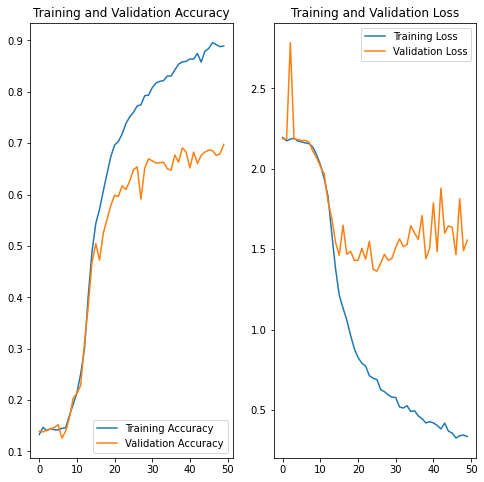

In [54]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### **Todo:**  Analyze your results here. Did you get rid of underfitting/overfitting? Did class rebalance help?

The accuracy of the model in terms of training as well as validation has increased by a huge margin touching 90% but the overfitting still exists as a problem after the 20th epoch. Class rebalance has not really contributed much in terms of reducing overfitting. It can be further be reduced by hyper parameter tuning of the filters and also the layers. Transfer Learning can also be brought into picture to reduce the overfitting problem and also further increase the accuracy of the model  

